In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('datasets.csv') 
data.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [4]:
data.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

In [5]:
# Recreate a dataframe based on features and target columns.
cols = ['age', 'sex', 'pO2_saturation', 'temperature', 'finding']
df = data[cols]

# Preparing Dataset

In [6]:
# number of missing data group by each column.
df.isnull().sum()

age               237
sex                80
pO2_saturation    831
temperature       872
finding             0
dtype: int64

In [7]:
# remove row that contains more than 2 NaN value.
df1 = df.dropna(axis = 0, how='any', thresh=2)

In [8]:
df1.isnull().sum()

age               180
sex                23
pO2_saturation    774
temperature       815
finding             0
dtype: int64

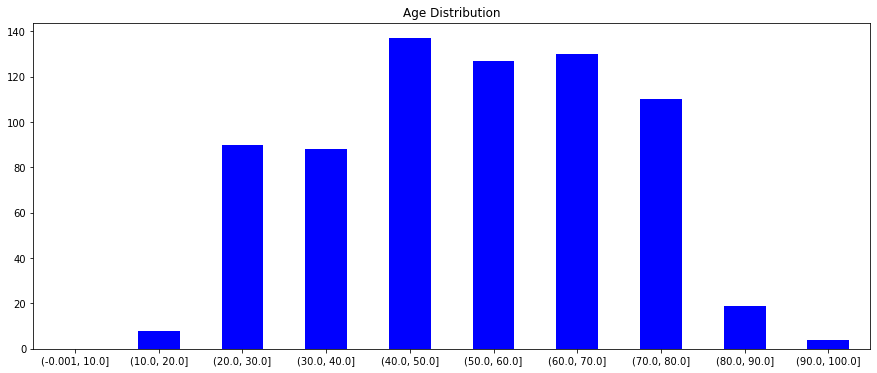

In [9]:
# age distrubtion 
out = pd.cut(df1['age'], bins=np.arange(0,110,10).tolist(), include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,6), title= "Age Distribution")

In [10]:
df1["age"] = df1["age"].fillna(df1["age"].median())

C:\Users\Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


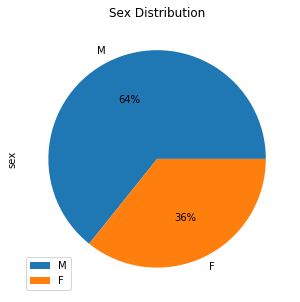

In [11]:
# Sex distribution
ax = df1['sex'].value_counts().plot.pie(y='sex', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Sex Distribution')

In [12]:
# replace nan value with 'M'
df1['sex'] = df1['sex'].fillna('M')

C:\Users\Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
# apply a function that change sex value to numerical.
df1["sex"] = df1["sex"].apply(lambda s: 1 if s == 'M' else 0)

C:\Users\Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df1.sex.isnull().sum()

0

In [15]:
df1["pO2_saturation"].isnull().sum()

774

In [16]:
df1["pO2_saturation"] = df1["pO2_saturation"].fillna(df1["pO2_saturation"].median())

C:\Users\Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


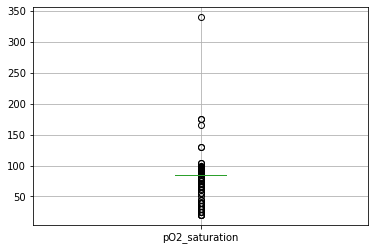

In [17]:
# observing outliers
df1.boxplot(column=["pO2_saturation"])

C:\Users\Pro\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


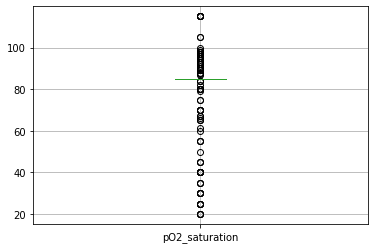

In [18]:
# remove outliers
pO2_max_value = 115
df1.loc[df1["pO2_saturation"] > pO2_max_value, "pO2_saturation"] = pO2_max_value
df1.boxplot(column=["pO2_saturation"])

In [19]:
df1["temperature"].isnull().sum()

815

In [20]:
df1["temperature"] = df1["temperature"].fillna(df1["temperature"].median())

C:\Users\Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


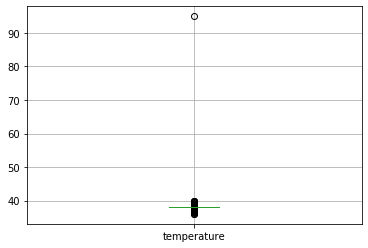

In [21]:
# observing outliers
df1.boxplot(column=["temperature"])

C:\Users\Pro\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


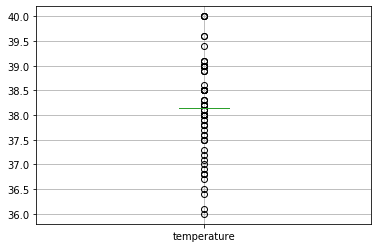

In [22]:
# remove outliers
temperature_max_value = 40
df1.loc[df1["temperature"] > temperature_max_value, "temperature"] = temperature_max_value
df1.boxplot(column=["temperature"])

In [23]:
df1["finding"].value_counts()

Pneumonia/Viral/COVID-19                   542
todo                                        82
Pneumonia                                   80
Pneumonia/Fungal/Pneumocystis               27
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial                          4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Asp

In [24]:
# apply a function that change target value to numerical.
df1["finding"] = df1["finding"].apply(lambda val: 1 if val.find('COVID-19') != -1 else 0)

C:\Users\Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# number for each class
df1["finding"].value_counts()

1    542
0    351
Name: finding, dtype: int64

In [26]:
df1.astype({'finding' : 'object'}).dtypes

age               float64
sex                 int64
pO2_saturation    float64
temperature       float64
finding            object
dtype: object

In [27]:
df1.dtypes

age               float64
sex                 int64
pO2_saturation    float64
temperature       float64
finding             int64
dtype: object

In [28]:
cleaned_data = df1.copy()
cleaned_data

,age,sex,pO2_saturation,temperature,finding
0,65.0,1,85.0,38.15,1
1,65.0,1,85.0,38.15,1
2,65.0,1,85.0,38.15,1
3,65.0,1,85.0,38.15,1
4,52.0,0,85.0,38.15,1
5,52.0,0,85.0,38.15,1
9,74.0,1,85.0,38.00,0
10,74.0,1,85.0,38.15,0
11,74.0,1,85.0,38.15,0
12,29.0,0,85.0,38.15,0


In [29]:
# zero NuN value in ourt dataset, so its clean.
cleaned_data.isnull().sum()

age               0
sex               0
pO2_saturation    0
temperature       0
finding           0
dtype: int64

# Ploting

C:\Users\Pro\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pro\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


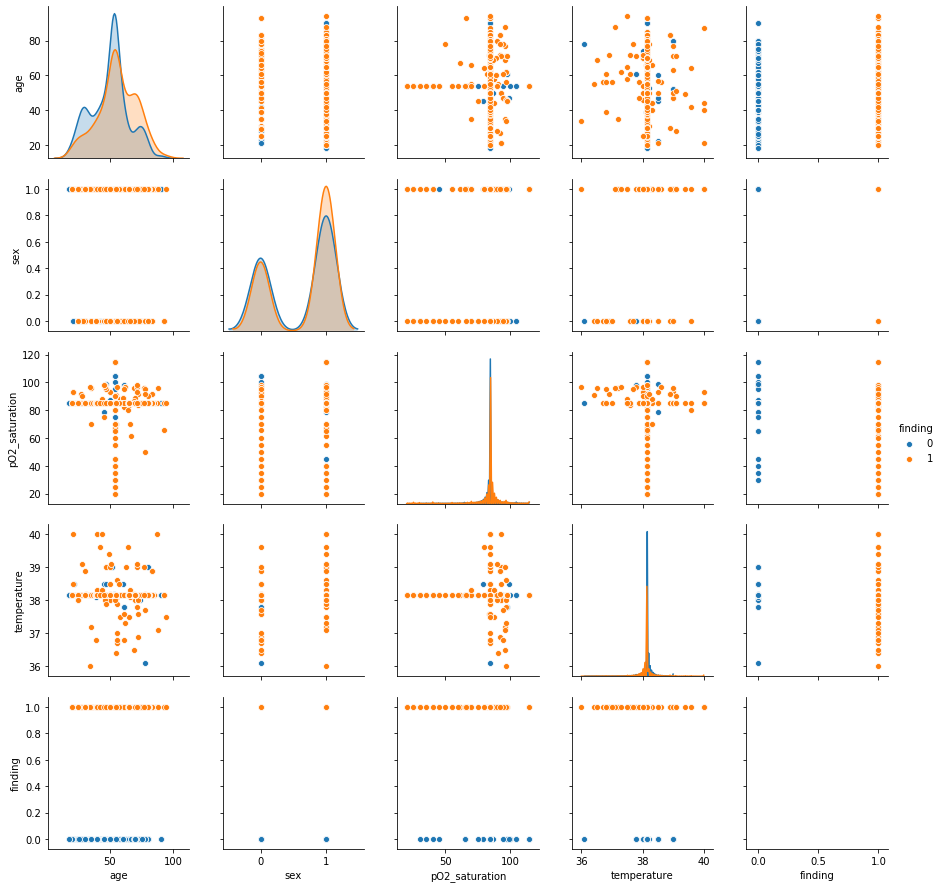

In [30]:
sns.pairplot(cleaned_data,hue='finding')

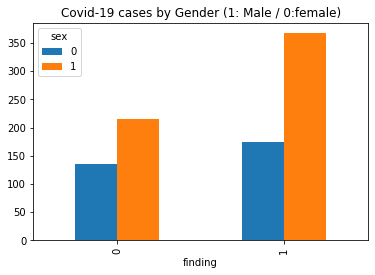

In [31]:
cleaned_data.groupby(["finding", "sex"]).size().unstack().plot.bar(title="Covid-19 cases by Gender (1: Male / 0:female)")

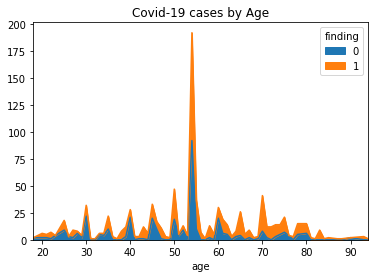

In [32]:
cleaned_data.groupby(["age", "finding"]).size().unstack().plot.area(title="Covid-19 cases by Age")

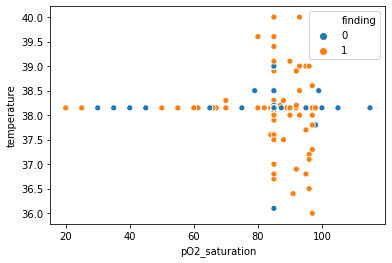

In [33]:
sns.scatterplot(data=cleaned_data[["pO2_saturation", "temperature", "finding"]], x="pO2_saturation", y="temperature", hue="finding")

# Classification Algorithms

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X = cleaned_data.iloc[:, :-1].values
y = cleaned_data.iloc[:, 4].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

In [37]:
print("Number of samples in train set: %d" % y_train.shape)
print("Number of positive samples in train set: %d" % (y_train == 1).sum(axis=0))
print("Number of negative samples in train set: %d" % (y_train == 0).sum(axis=0))
print()
print("Number of samples in test set: %d" % y_test.shape)
print("Number of positive samples in test set: %d" % (y_test == 1).sum(axis=0))
print("Number of negative samples in test set: %d" % (y_test == 0).sum(axis=0))

Number of samples in train set: 669
Number of positive samples in train set: 408
Number of negative samples in train set: 261

Number of samples in test set: 224
Number of positive samples in test set: 134
Number of negative samples in test set: 90


In [38]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbors 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
n_neighbors = 30
knn_clf = KNeighborsClassifier(n_neighbors)
knn_clf.fit(X_train, y_train)
knn_predict = knn_clf.predict(X_test)

In [41]:
print(confusion_matrix(y_test, knn_predict))

[[54 36]
 [38 96]]


In [42]:
print('\n')
print(classification_report(y_test, knn_predict))



              precision    recall  f1-score   support

           0       0.59      0.60      0.59        90
           1       0.73      0.72      0.72       134

    accuracy                           0.67       224
   macro avg       0.66      0.66      0.66       224
weighted avg       0.67      0.67      0.67       224



In [43]:
error_rate = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

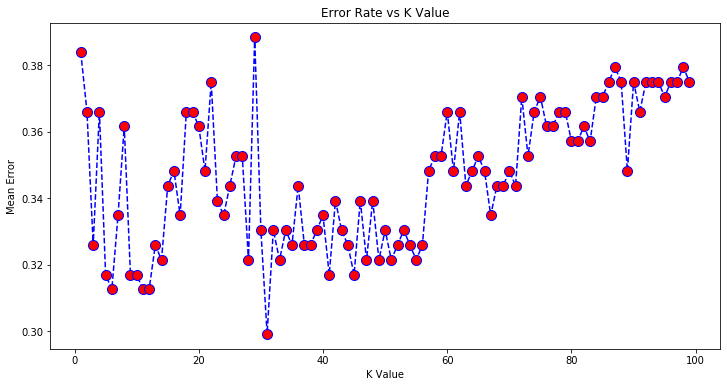

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [45]:
print("The optimum K is {}".format(error_rate.index(min(error_rate))))

The optimum K is 30


# SVM

In [46]:
from sklearn.svm import SVC

In [47]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predict = svm_clf.predict(X_test)

In [48]:
print(confusion_matrix(y_test, svm_predict))

[[ 16  74]
 [ 10 124]]


In [49]:
print('\n')
print(classification_report(y_test, svm_predict))



              precision    recall  f1-score   support

           0       0.62      0.18      0.28        90
           1       0.63      0.93      0.75       134

    accuracy                           0.62       224
   macro avg       0.62      0.55      0.51       224
weighted avg       0.62      0.62      0.56       224



In [50]:
# we use Grid Search for tunning our SVM and looking up for best parameters.
from sklearn.model_selection import GridSearchCV 

In [51]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose =3)
grid.fit(X_train, y_train) 

C:\Users\Pro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.610, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.619, total=   0.0s
[CV] C=0.1, gamma=0.1

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [52]:
# best parameter after tuning 
print(grid.best_params_) 
# how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.01}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [53]:
grid_predict = grid.predict(X_test)

In [54]:
print('\n')
print(classification_report(y_test, grid_predict)) 



              precision    recall  f1-score   support

           0       0.63      0.19      0.29        90
           1       0.63      0.93      0.75       134

    accuracy                           0.63       224
   macro avg       0.63      0.56      0.52       224
weighted avg       0.63      0.63      0.56       224



# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)

In [57]:
print(confusion_matrix(y_test, dt_predict))

[[63 27]
 [37 97]]


In [58]:
print('\n')
print(classification_report(y_test, dt_predict))



              precision    recall  f1-score   support

           0       0.63      0.70      0.66        90
           1       0.78      0.72      0.75       134

    accuracy                           0.71       224
   macro avg       0.71      0.71      0.71       224
weighted avg       0.72      0.71      0.72       224



# Random Forests

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_predict = rf_clf.predict(X_test)

In [61]:
print(confusion_matrix(y_test, rf_predict))

[[ 63  27]
 [ 32 102]]


In [62]:
print('\n')
print(classification_report(y_test, rf_predict))



              precision    recall  f1-score   support

           0       0.66      0.70      0.68        90
           1       0.79      0.76      0.78       134

    accuracy                           0.74       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.74      0.74      0.74       224



# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_predict = lr_clf.predict(X_test)

C:\Users\Pro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
print(confusion_matrix(y_test, lr_predict))

[[ 28  62]
 [ 13 121]]


In [66]:
print('\n')
print(classification_report(y_test, lr_predict))



              precision    recall  f1-score   support

           0       0.68      0.31      0.43        90
           1       0.66      0.90      0.76       134

    accuracy                           0.67       224
   macro avg       0.67      0.61      0.60       224
weighted avg       0.67      0.67      0.63       224



# Le meilleur algorithme pour cet dataset: RANDOM FOREST.

### Moad Boulahdoud - Data Science Student